In [1]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# To test max vel ~4
m = []
m.append(0)
for i in range(100001):
    environment = gym.make("CartPole-v1", render_mode=None)
    state = environment.reset()
    terminated = False
    if i%10000==0: print(f"{max(m)} ---- {min(m)} ---- {i}")
    while not terminated:
        new_state, reward, terminated, truncated, info = environment.step(environment.action_space.sample())
        m.append(new_state[1])
        state = new_state

print(f'Reward = {reward}\nterminated = {terminated}\ntruncated = {truncated}\nnew_state = {new_state}\npossible_actions={environment.action_space.n}\n')

0 ---- 0 ---- 0
2.8661000728607178 ---- -3.067591667175293 ---- 10000
2.901942491531372 ---- -3.1152749061584473 ---- 20000
2.901942491531372 ---- -3.1152749061584473 ---- 30000
3.1586031913757324 ---- -3.1152749061584473 ---- 40000
3.2788002490997314 ---- -3.1152749061584473 ---- 50000
3.2788002490997314 ---- -3.236091375350952 ---- 60000
3.2788002490997314 ---- -3.236091375350952 ---- 70000
3.2788002490997314 ---- -3.236091375350952 ---- 80000
3.2788002490997314 ---- -3.236091375350952 ---- 90000
3.2788002490997314 ---- -3.236091375350952 ---- 100000
Reward = 1.0
terminated = True
truncated = False
new_state = [ 0.14293419  0.37738386 -0.21086596 -1.0022368 ]
possible_actions=2



In [3]:
env = gym.make("CartPole-v1", render_mode=None)

# Max velocity in training ~4
# Because we can have inf combinations, we limit it to 10
pos = np.linspace(-2.4, 2.4, 10)
vel = np.linspace(-4, 4, 10)
ang = np.linspace(-.2095, .2095, 10)
ang_vel = np.linspace(-4, 4, 10)

# Se suma 1 ya que al utilizar la función digitalize utilizar un rango extra --11x11x11x11x2
qtable = np.zeros((len(pos)+1, len(vel)+1, len(ang)+1, len(ang_vel)+1, env.action_space.n))

# Hyperparameters
learning_rate = 0.1    # Learning rate
discount_factor = 0.8  # Discount factor
epsilon = 1.0          # Amount of randomness in the action selection
epsilon_decay = 0.00001 # Fixed amount to decrease
rng = np.random.default_rng() # Random number generator

rewards_per_episode = []
i = 0 # for printing purposes

while True:
    
    state = env.reset()[0]
    state_p = np.digitize(state[0], pos)
    state_v = np.digitize(state[1], vel)
    state_a = np.digitize(state[2], ang)
    state_av = np.digitize(state[3], ang_vel)

    terminated = False
    rewards = 0

    while (not terminated and rewards < 10000):

        if rng.random() < epsilon: action = env.action_space.sample() # Choose random action 0=left 1=right
        else: action = np.argmax(qtable[state_p, state_v, state_a, state_av, :])

        new_state, reward, terminated, _, _ = env.step(action)
        new_state_p = np.digitize(new_state[0], pos)
        new_state_v = np.digitize(new_state[1], vel)
        new_state_a = np.digitize(new_state[2], ang)
        new_state_av= np.digitize(new_state[3], ang_vel)

        qtable[state_p, state_v, state_a, state_av, action] = qtable[state_p, state_v, state_a, state_av, action] + learning_rate * (
            reward + discount_factor*np.max(qtable[new_state_p, new_state_v, new_state_a, new_state_av, :]) - qtable[state_p, state_v, state_a, state_av, action]
        )

        state = new_state
        state_p = new_state_p
        state_v = new_state_v
        state_a = new_state_a
        state_av = new_state_av

        rewards += reward

    rewards_per_episode.append(rewards)
    # Calculate avg reward in last 100 episodes
    mean_rewards = np.mean(rewards_per_episode[len(rewards_per_episode)-100:])

    # Print information about development of training
    if i%100==0: print(f'Episode: {i} Rewards:{rewards}  Epsilon: {epsilon:0.2f}  Mean Rewards {mean_rewards:0.1f}')

    if mean_rewards > 100: break

    epsilon = max(epsilon - epsilon_decay, 0)

    i+=1

print(f'Episode: {i} Rewards:{rewards}  Epsilon: {epsilon:0.2f}  Mean Rewards {mean_rewards:0.1f}')
env.close()

Episode: 0 Rewards:15.0  Epsilon: 1.00  Mean Rewards 15.0
Episode: 100 Rewards:27.0  Epsilon: 1.00  Mean Rewards 21.2
Episode: 200 Rewards:17.0  Epsilon: 1.00  Mean Rewards 21.4
Episode: 300 Rewards:19.0  Epsilon: 1.00  Mean Rewards 22.0
Episode: 400 Rewards:26.0  Epsilon: 1.00  Mean Rewards 23.0
Episode: 500 Rewards:13.0  Epsilon: 1.00  Mean Rewards 22.6
Episode: 600 Rewards:26.0  Epsilon: 0.99  Mean Rewards 20.9
Episode: 700 Rewards:10.0  Epsilon: 0.99  Mean Rewards 22.0
Episode: 800 Rewards:63.0  Epsilon: 0.99  Mean Rewards 23.2
Episode: 900 Rewards:22.0  Epsilon: 0.99  Mean Rewards 23.6
Episode: 1000 Rewards:14.0  Epsilon: 0.99  Mean Rewards 20.3
Episode: 1100 Rewards:82.0  Epsilon: 0.99  Mean Rewards 23.7
Episode: 1200 Rewards:15.0  Epsilon: 0.99  Mean Rewards 23.0
Episode: 1300 Rewards:43.0  Epsilon: 0.99  Mean Rewards 23.3
Episode: 1400 Rewards:14.0  Epsilon: 0.99  Mean Rewards 22.9
Episode: 1500 Rewards:23.0  Epsilon: 0.99  Mean Rewards 26.7
Episode: 1600 Rewards:15.0  Epsilon:

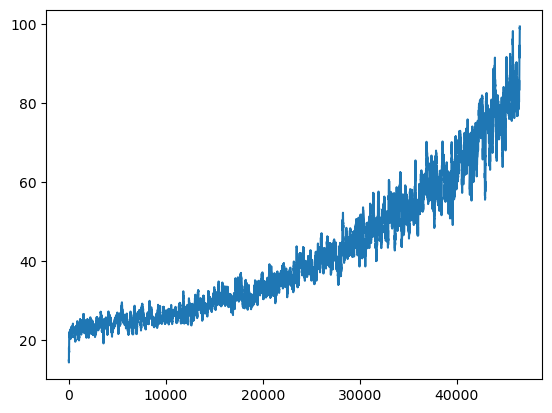

In [4]:
mean_rewards = []
for t in range(i):
    mean_rewards.append(np.mean(rewards_per_episode[max(0, t-100):(t+1)]))
plt.plot(mean_rewards)